___
# Ciência dos Dados - PROJETO 1

## Rodrigo Crespo
___

## INTERNET NAS PLATAFORMAS

___
## Introdução

Pergunta:
Qual dispositivo que pode acessar a internet é o mais utilizado entre as diferentes rendas em São Paulo e Rio de Janeiro.


___
## Análise e Resultados

In [668]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# qual é o dispositivo mais utilizado em sao paulo para acessar a internet e qual tipo de coneccao é mais utilizada?


In [669]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())
dados2015 = pd.read_csv('DOM2015.csv',sep=',')
dados2015= pd.DataFrame(dados2015)

Esperamos trabalhar no diretório
C:\Users\rod_c\Documents\GitHub\ciencia_dados


In [670]:
#DADOS DE 2015

#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')
dados_lido = dados2015.loc[:,['UF','V02323','V02324','V02325','V02326','V02327','V02424','V02425','V02426','V4621']]
dados_lido= dados_lido[pd.notnull(dados_lido.UF)&       pd.notnull(dados_lido.V02323)&                        pd.notnull(dados_lido.V02324)&                        pd.notnull(dados_lido.V02325)&                        pd.notnull(dados_lido.V02326)&  pd.notnull(dados_lido.V02327)&  pd.notnull(dados_lido.V02424)&  pd.notnull(dados_lido.V02425)& pd.notnull(dados_lido.V02426)]
dados_lido.to_csv('dados_prontos2015.csv')
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [671]:
#DADOS DE 2015


dados_2015 = pd.read_csv('dados_prontos2015.csv',sep=',')
dados_2015 = pd.DataFrame(dados_lido)
dados_2015.UF = dados2015.UF.astype('category')
dados_2015.V02323 = dados2015.V02323.astype('category')
dados_2015.V02324 = dados2015.V02324.astype('category')
dados_2015.V02325 = dados2015.V02325.astype('category')
dados_2015.V02326 = dados2015.V02326.astype('category')
dados_2015.V02327 = dados2015.V02327.astype('category')
dados_2015.V02424 = dados2015.V02424.astype('category')
dados_2015.V02425 = dados2015.V02425.astype('category')
dados_2015.V02426 = dados2015.V02426.astype('category')


dados_2015.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")


dados_2015.V02323.cat.categories = ('Sim','Não')
dados_2015.V02324.cat.categories = ('Sim','Não')
dados_2015.V02325.cat.categories = ('Sim','Não')
dados_2015.V02326.cat.categories = ('Sim','Não')
dados_2015.V02327.cat.categories = ('Sim','Não')
dados_2015.V02424.cat.categories = ('Sim','Não')
dados_2015.V02425.cat.categories = ('Sim','Não')
dados_2015.V02426.cat.categories = ('Sim','Não')
dados_2015.columns = ['UF','MICROCOMPUTADOR','CELULAR','TABLET','TV','OUTRO_EQUIP','_3G_OU_4G','CONEXÃO_DISCADA','BANDA_LARGA','Renda_Domiciliar']
#dados_15 =dados_2015[dados_2015.UF == 'São Paulo']
dados_2015=dados_2015[dados_2015["Renda_Domiciliar"]!= 999999999999.0]

dados_15 =dados_2015[(dados_2015.UF == 'São Paulo') | (dados_2015.UF =='Rio de Janeiro')]

renda_baixa_5 = dados_15[dados_15.Renda_Domiciliar <= 930]
renda_media_5 = dados_15[(dados_15.Renda_Domiciliar >930) & (dados_15.Renda_Domiciliar <= 2790)]
renda_alta_5 = dados_15[dados_15.Renda_Domiciliar > 2790]



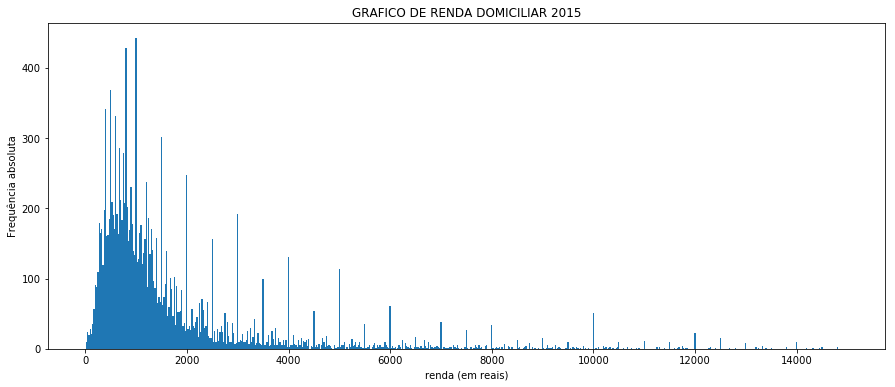

In [672]:
#tabela
faixa= range(10,15000,25)
plot = dados_15.Renda_Domiciliar.plot.hist(bins=faixa,title='GRAFICO DE RENDA DOMICILIAR 2015', figsize=(15, 6), alpha=1)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

In [673]:
#CROSSTAB RENDA BAIXA DE 2015
CELULAR_7 = pd.crosstab(renda_baixa_5.CELULAR, renda_baixa_5.UF)
CONEXÃO_DISCADA_7 = pd.crosstab(renda_baixa_5.CONEXÃO_DISCADA, renda_baixa_5.UF)
_3G_OU_4G_7 = pd.crosstab(renda_baixa_5._3G_OU_4G, renda_baixa_5.UF)
BANDA_LARGA_7 = pd.crosstab(renda_baixa_5.BANDA_LARGA, renda_baixa_5.UF)
TV_7 = pd.crosstab(renda_baixa_5.TV, renda_baixa_5.UF)
TABLET_7 = pd.crosstab(renda_baixa_5.TABLET, renda_baixa_5.UF)
MICROCOMPUTADOR_7 = pd.crosstab(renda_baixa_5.MICROCOMPUTADOR, renda_baixa_5.UF)

In [674]:
#CROSSTAB RENDA MEDIA DE 2015
CELULAR_8 = pd.crosstab(renda_media_5.CELULAR, renda_media_5.UF)
CONEXÃO_DISCADA_8 = pd.crosstab(renda_media_5.CONEXÃO_DISCADA, renda_media_5.UF)
_3G_OU_4G_8 = pd.crosstab(renda_media_5._3G_OU_4G, renda_media_5.UF)
BANDA_LARGA_8 = pd.crosstab(renda_media_5.BANDA_LARGA, renda_media_5.UF)
TV_8 = pd.crosstab(renda_media_5.TV, renda_media_5.UF)
TABLET_8 = pd.crosstab(renda_media_5.TABLET, renda_media_5.UF)
MICROCOMPUTADOR_8 = pd.crosstab(renda_media_5.MICROCOMPUTADOR, renda_media_5.UF)

In [675]:
#CROSSTAB RENDA ALTA DE 2015
CELULAR_9 = pd.crosstab(renda_alta_5.CELULAR, renda_alta_5.UF)
CONEXÃO_DISCADA_9 = pd.crosstab(renda_alta_5.CONEXÃO_DISCADA, renda_alta_5.UF)
_3G_OU_4G_9 = pd.crosstab(renda_alta_5._3G_OU_4G, renda_alta_5.UF)
BANDA_LARGA_9 = pd.crosstab(renda_alta_5.BANDA_LARGA, renda_alta_5.UF)
TV_9 = pd.crosstab(renda_alta_5.TV, renda_alta_5.UF)
TABLET_9 = pd.crosstab(renda_alta_5.TABLET, renda_alta_5.UF)
MICROCOMPUTADOR_9 = pd.crosstab(renda_alta_5.MICROCOMPUTADOR, renda_alta_5.UF)

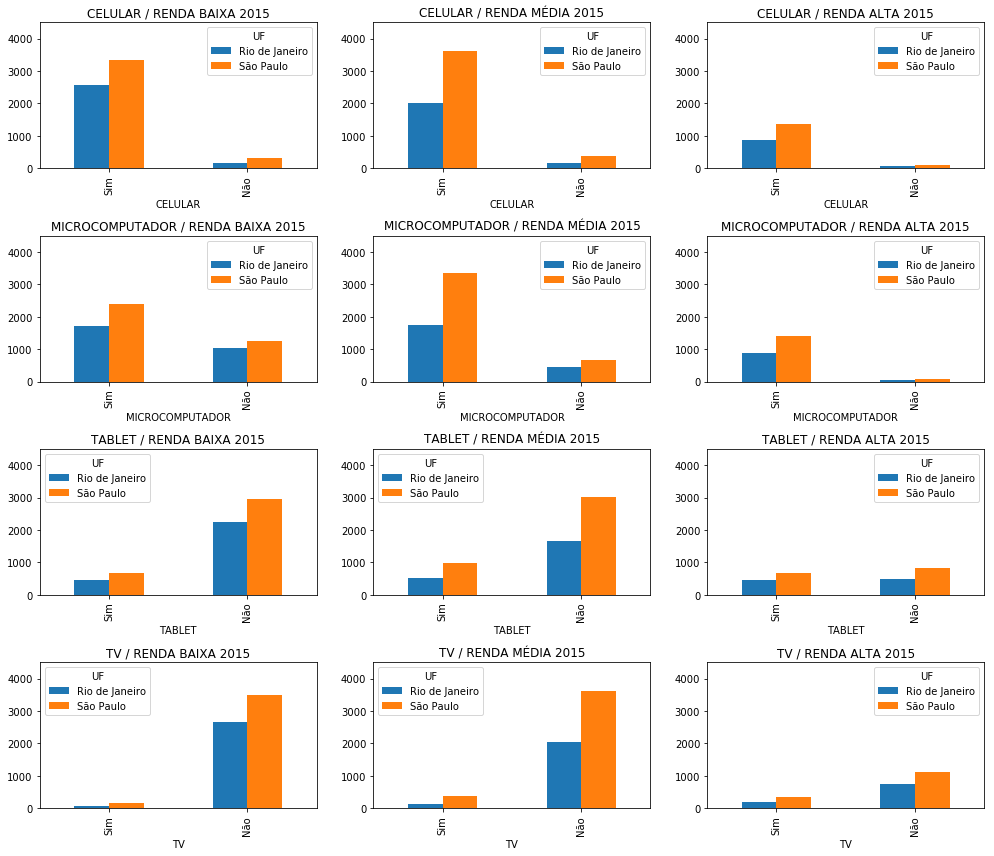

In [676]:
fig,axes = plt.subplots(nrows=4,ncols=3)

############################# TIPOS DE DISPOSITIVOS ############################

#RENDA BAIXA DE 2015

CELULAR_7.plot(ylim=(0,4500),kind='bar' , ax=axes[0,0] , figsize=(10,7)); axes[0,0].set_title('CELULAR / RENDA BAIXA 2015')
MICROCOMPUTADOR_7.plot( kind='bar',ax=axes[1,0],figsize=(10,7), ylim=(0,4500)); axes[1,0].set_title('MICROCOMPUTADOR / RENDA BAIXA 2015')
TABLET_7.plot(kind='bar',ax=axes[2,0],figsize=(10,7), ylim=(0,4500)); axes[2,0].set_title('TABLET / RENDA BAIXA 2015')
TV_7.plot(ylim = (0,4500),kind='bar',ax=axes[3,0], figsize=(14,12)); axes[3,0].set_title('TV / RENDA BAIXA 2015')

#RENDA MÉDIA DE 2014

CELULAR_8.plot(ylim=(0,4500),kind='bar' , ax=axes[0,1] , figsize=(10,7)); axes[0,1].set_title('CELULAR / RENDA MÉDIA 2015')
MICROCOMPUTADOR_8.plot( kind='bar',ax=axes[1,1],figsize=(10,7), ylim=(0,4500)); axes[1,1].set_title('MICROCOMPUTADOR / RENDA MÉDIA 2015')
TABLET_8.plot(kind='bar',ax=axes[2,1],figsize=(10,7), ylim=(0,4500)); axes[2,1].set_title('TABLET / RENDA MÉDIA 2015')
TV_8.plot(ylim = (0,4500),kind='bar',ax=axes[3,1], figsize=(14,12)); axes[3,1].set_title('TV / RENDA MÉDIA 2015')

#RENDA ALTA DE 2014

CELULAR_9.plot(ylim=(0,4500),kind='bar' , ax=axes[0,2] , figsize=(10,7)); axes[0,2].set_title('CELULAR / RENDA ALTA 2015')
MICROCOMPUTADOR_9.plot( kind='bar',ax=axes[1,2],figsize=(10,7), ylim=(0,4500)); axes[1,2].set_title('MICROCOMPUTADOR / RENDA ALTA 2015')
TABLET_9.plot(kind='bar',ax=axes[2,2],figsize=(10,7), ylim=(0,4500)); axes[2,2].set_title('TABLET / RENDA ALTA 2015')
TV_9.plot(ylim = (0,4500),kind='bar',ax=axes[3,2], figsize=(14,12)); axes[3,2].set_title('TV / RENDA ALTA 2015')

plt.tight_layout()

In [677]:
#DADOS DE 2014

#lendo o arquivo grande do ano de 2014
dados2014 = pd.read_csv('DOM2014.csv', sep=',')
dados2014= pd.DataFrame(dados2014)
dados_lido2014 = dados2014.loc[:,['UF','V02323','V02324','V02325','V02326','V02327','V02424','V02425','V02426','V4621']]
dados_lido2014= dados_lido2014[pd.notnull(dados_lido2014.UF)&       pd.notnull(dados_lido2014.V02323)&                        pd.notnull(dados_lido2014.V02324)&                        pd.notnull(dados_lido2014.V02325)&                        pd.notnull(dados_lido2014.V02326)&  pd.notnull(dados_lido2014.V02327)&  pd.notnull(dados_lido2014.V02424)&  pd.notnull(dados_lido2014.V02425)& pd.notnull(dados_lido2014.V02426)]
dados_lido2014.to_csv('dados_prontos2014.csv')
#criando um novo arquivo para o ano de 2014
dados_2014 = pd.read_csv('dados_prontos2014.csv',sep=',')
dados_2014 = pd.DataFrame(dados_lido2014)


dados_2014.UF = dados2014.UF.astype('category')
dados_2014.V02323 = dados2014.V02323.astype('category')
dados_2014.V02324 = dados2014.V02324.astype('category')
dados_2014.V02325 = dados2014.V02325.astype('category')
dados_2014.V02326 = dados2014.V02326.astype('category')
dados_2014.V02327 = dados2014.V02327.astype('category')
dados_2014.V02424 = dados2014.V02424.astype('category')
dados_2014.V02425 = dados2014.V02425.astype('category')
dados_2014.V02426 = dados2014.V02426.astype('category')


dados_2014.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")



dados_2014.V02323.cat.categories = ('Sim','Não')
dados_2014.V02324.cat.categories = ('Sim','Não')
dados_2014.V02325.cat.categories = ('Sim','Não')
dados_2014.V02326.cat.categories = ('Sim','Não')
dados_2014.V02327.cat.categories = ('Sim','Não')
dados_2014.V02424.cat.categories = ('Sim','Não')
dados_2014.V02425.cat.categories = ('Sim','Não')
dados_2014.V02426.cat.categories = ('Sim','Não')
dados_2014.columns = ['UF','MICROCOMPUTADOR','CELULAR','TABLET','TV','OUTRO_EQUIP','_3G_OU_4G','CONEXÃO_DISCADA','BANDA_LARGA','Renda_Domiciliar']

dados_2014=dados_2014[dados_2014["Renda_Domiciliar"]!= 999999999999.0]

dados_14 =dados_2014[(dados_2014.UF == 'São Paulo') | (dados_2014.UF =='Rio de Janeiro')]

renda_baixa_4 = dados_14[dados_14.Renda_Domiciliar <= 930]
renda_media_4 = dados_14[(dados_14.Renda_Domiciliar >930) & (dados_14.Renda_Domiciliar < 2790)]
renda_alta_4 = dados_14[dados_14.Renda_Domiciliar > 2790]




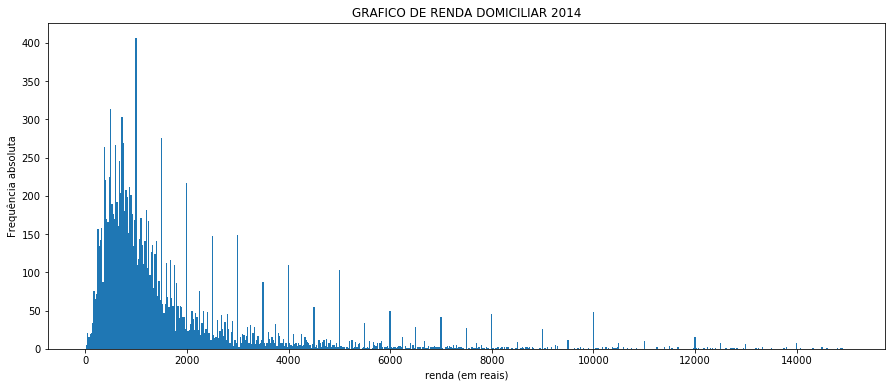

In [678]:
#tabela
faixa= range(10,15000,25)
plot = dados_14.Renda_Domiciliar.plot.hist(bins=faixa,title='GRAFICO DE RENDA DOMICILIAR 2014', figsize=(15, 6), alpha=1)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

In [679]:
#CROSSTAB RENDA BAIXA DE 2014
CELULAR_4 = pd.crosstab(renda_baixa_4.CELULAR, renda_baixa_4.UF)
CONEXÃO_DISCADA_4 = pd.crosstab(renda_baixa_4.CONEXÃO_DISCADA, renda_baixa_4.UF)
_3G_OU_4G_4 = pd.crosstab(renda_baixa_4._3G_OU_4G, renda_baixa_4.UF)
BANDA_LARGA_4 = pd.crosstab(renda_baixa_4.BANDA_LARGA, renda_baixa_4.UF)
TV_4 = pd.crosstab(renda_baixa_4.TV, renda_baixa_4.UF)
TABLET_4 = pd.crosstab(renda_baixa_4.TABLET, renda_baixa_4.UF)
MICROCOMPUTADOR_4 = pd.crosstab(renda_baixa_4.MICROCOMPUTADOR, renda_baixa_4.UF)

In [680]:
#CROSSTAB RENDA MEDIA DE 2014
CELULAR_5 = pd.crosstab(renda_media_4.CELULAR, renda_media_4.UF)
CONEXÃO_DISCADA_5 = pd.crosstab(renda_media_4.CONEXÃO_DISCADA, renda_media_4.UF)
_3G_OU_4G_5 = pd.crosstab(renda_media_4._3G_OU_4G, renda_media_4.UF)
BANDA_LARGA_5 = pd.crosstab(renda_media_4.BANDA_LARGA, renda_media_4.UF)
TV_5 = pd.crosstab(renda_media_4.TV, renda_media_4.UF)
TABLET_5 = pd.crosstab(renda_media_4.TABLET, renda_media_4.UF)
MICROCOMPUTADOR_5 = pd.crosstab(renda_media_4.MICROCOMPUTADOR, renda_media_4.UF)

In [681]:
#CROSSTAB RENDA ALTA DE 2014
CELULAR_6 = pd.crosstab(renda_alta_4.CELULAR, renda_alta_4.UF)
CONEXÃO_DISCADA_6 = pd.crosstab(renda_alta_4.CONEXÃO_DISCADA, renda_alta_4.UF)
_3G_OU_4G_6 = pd.crosstab(renda_alta_4._3G_OU_4G, renda_alta_4.UF)
BANDA_LARGA_6 = pd.crosstab(renda_alta_4.BANDA_LARGA, renda_alta_4.UF)
TV_6 = pd.crosstab(renda_alta_4.TV, renda_alta_4.UF)
TABLET_6 = pd.crosstab(renda_alta_4.TABLET, renda_alta_4.UF)
MICROCOMPUTADOR_6 = pd.crosstab(renda_alta_4.MICROCOMPUTADOR, renda_alta_4.UF)

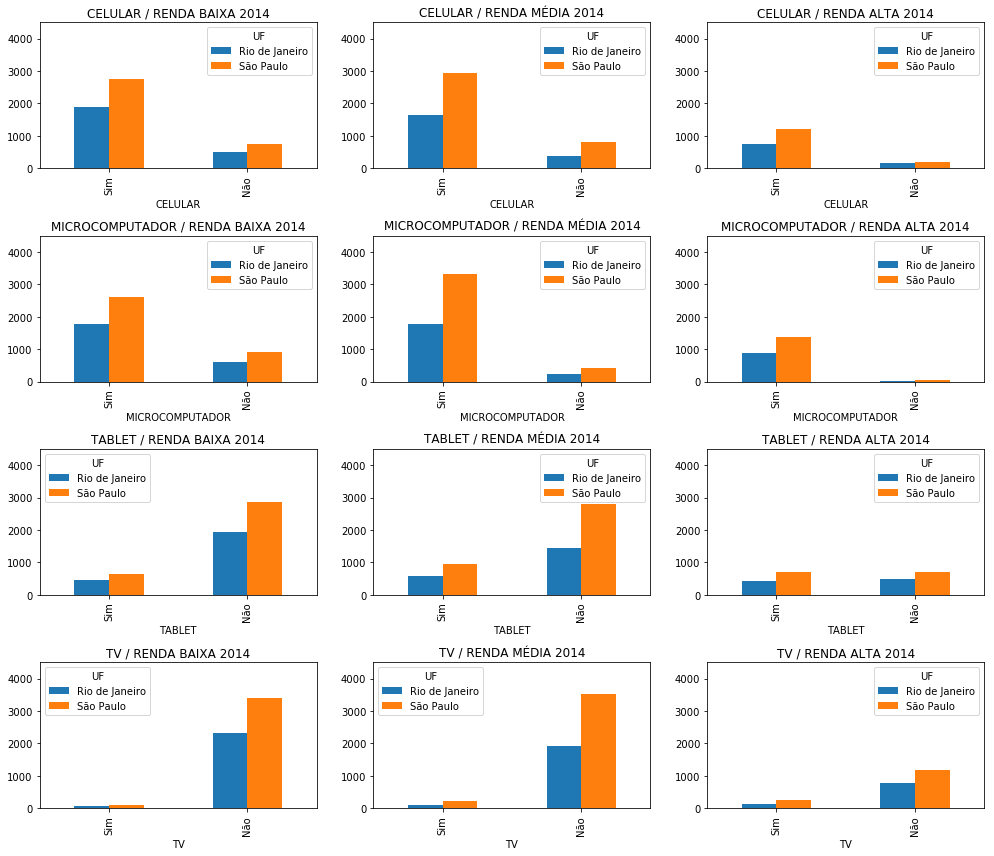

In [682]:
fig,axes = plt.subplots(nrows=4,ncols=3)
#RENDA BAIXA DE 2014

CELULAR_4.plot(ylim=(0,4500),kind='bar' , ax=axes[0,0] , figsize=(10,7)); axes[0,0].set_title('CELULAR / RENDA BAIXA 2014')
MICROCOMPUTADOR_4.plot( kind='bar',ax=axes[1,0],figsize=(10,7), ylim=(0,4500)); axes[1,0].set_title('MICROCOMPUTADOR / RENDA BAIXA 2014')
TABLET_4.plot(kind='bar',ax=axes[2,0],figsize=(10,7), ylim=(0,4500)); axes[2,0].set_title('TABLET / RENDA BAIXA 2014')
TV_4.plot(ylim = (0,4500),kind='bar',ax=axes[3,0], figsize=(14,12)); axes[3,0].set_title('TV / RENDA BAIXA 2014')

#RENDA MÉDIA DE 2014

CELULAR_5.plot(ylim=(0,4500),kind='bar' , ax=axes[0,1] , figsize=(10,7)); axes[0,1].set_title('CELULAR / RENDA MÉDIA 2014')
MICROCOMPUTADOR_5.plot( kind='bar',ax=axes[1,1],figsize=(10,7), ylim=(0,4500)); axes[1,1].set_title('MICROCOMPUTADOR / RENDA MÉDIA 2014')
TABLET_5.plot(kind='bar',ax=axes[2,1],figsize=(10,7), ylim=(0,4500)); axes[2,1].set_title('TABLET / RENDA MÉDIA 2014')
TV_5.plot(ylim = (0,4500),kind='bar',ax=axes[3,1], figsize=(14,12)); axes[3,1].set_title('TV / RENDA MÉDIA 2014')

#RENDA ALTA DE 2014

CELULAR_6.plot(ylim=(0,4500),kind='bar' , ax=axes[0,2] , figsize=(10,7)); axes[0,2].set_title('CELULAR / RENDA ALTA 2014')
MICROCOMPUTADOR_6.plot( kind='bar',ax=axes[1,2],figsize=(10,7), ylim=(0,4500)); axes[1,2].set_title('MICROCOMPUTADOR / RENDA ALTA 2014')
TABLET_6.plot(kind='bar',ax=axes[2,2],figsize=(10,7), ylim=(0,4500)); axes[2,2].set_title('TABLET / RENDA ALTA 2014')
TV_6.plot(ylim = (0,4500),kind='bar',ax=axes[3,2], figsize=(14,12)); axes[3,2].set_title('TV / RENDA ALTA 2014')

plt.tight_layout()

In [683]:
#DADOS DE 2013

#lendo o arquivo grande do ano de 2013
dados2013 = pd.read_csv('DOM2013.csv', sep=',')
dados2013= pd.DataFrame(dados2013)
dados_lido2013 = dados2013.loc[:,['UF','V02323','V02324','V02325','V02326','V02327','V02424','V02425','V02426','V4621']]
dados_lido2013= dados_lido2013[pd.notnull(dados_lido2013.UF)&       pd.notnull(dados_lido2013.V02323)&                        pd.notnull(dados_lido2013.V02324)&                        pd.notnull(dados_lido2013.V02325)&                        pd.notnull(dados_lido2013.V02326)&  pd.notnull(dados_lido2013.V02327)&  pd.notnull(dados_lido2013.V02424)&  pd.notnull(dados_lido2013.V02425)& pd.notnull(dados_lido2013.V02426) & pd.notnull(dados_lido2013.V4621)]
dados_lido2013.to_csv('dados_prontos2013.csv')
#criando um novo arquivo para o ano de 2014
dados_2013 = pd.read_csv('dados_prontos2013.csv',sep=',')
dados_2013 = pd.DataFrame(dados_lido2013)

dados_2013.UF = dados2013.UF.astype('category')
dados_2013.V02323 = dados2013.V02323.astype('category')
dados_2013.V02324 = dados2013.V02324.astype('category')
dados_2013.V02325 = dados2013.V02325.astype('category')
dados_2013.V02326 = dados2013.V02326.astype('category')
dados_2013.V02327 = dados2013.V02327.astype('category')
dados_2013.V02424 = dados2013.V02424.astype('category')
dados_2013.V02425 = dados2013.V02425.astype('category')
dados_2013.V02426 = dados2013.V02426.astype('category')

dados_2013.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")

dados_2013.V02323.cat.categories = ('Sim','Não')
dados_2013.V02324.cat.categories = ('Sim','Não')
dados_2013.V02325.cat.categories = ('Sim','Não')
dados_2013.V02326.cat.categories = ('Sim','Não')
dados_2013.V02327.cat.categories = ('Sim','Não')
dados_2013.V02424.cat.categories = ('Sim','Não')
dados_2013.V02425.cat.categories = ('Sim','Não')
dados_2013.V02426.cat.categories = ('Sim','Não')

dados_2013.columns = ['UF','MICROCOMPUTADOR','CELULAR','TABLET','TV','OUTRO_EQUIP','_3G_OU_4G','CONEXÃO_DISCADA','BANDA_LARGA','Renda_Domiciliar']
dados_2013=dados_2013[dados_2013["Renda_Domiciliar"]!= 999999999999.0]
#dados_13 = dados_2013[dados_2013.UF == 'São Paulo']
#dados_23 = dados_2013[dados_2013.UF == 'Rio de Janeiro']

dados_13 =dados_2013[(dados_2013.UF == 'São Paulo') | (dados_2013.UF =='Rio de Janeiro')]

#SALÁRIO MINIMO DE R$ 930
#SALÁRIO MÉDIO DE ATÉ 3 SALÁRIOS MÍNIMOS
#SALÁRIO ALTO A PARTIR DE 3 SALÁRIOS MÍNIMOS

renda_baixa = dados_13[dados_13.Renda_Domiciliar <= 930]
renda_media = dados_13[(dados_13.Renda_Domiciliar >930) & (dados_13.Renda_Domiciliar < 2790)]
renda_alta = dados_13[dados_13.Renda_Domiciliar > 2790]

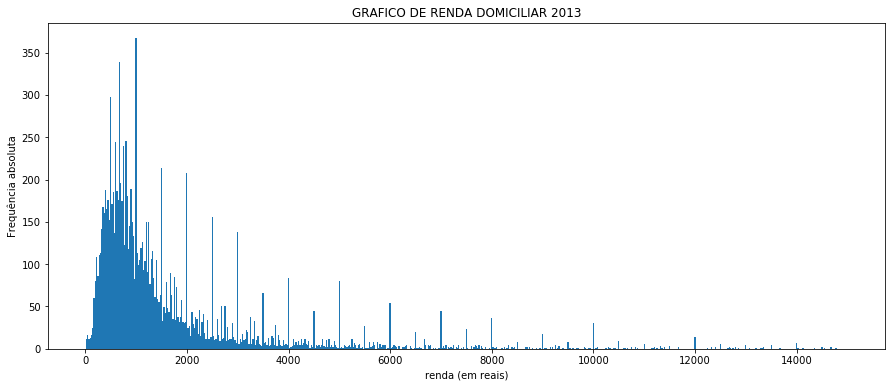

In [684]:
#tabela
faixa= range(10,15000,25)
plot = dados_13.Renda_Domiciliar.plot.hist(bins=faixa,title='GRAFICO DE RENDA DOMICILIAR 2013', figsize=(15, 6), alpha=1)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

In [685]:
#CROSSTAB RENDA BAIXA DE 2013
CELULAR_1 = pd.crosstab(renda_baixa.CELULAR, renda_baixa.UF)
CONEXÃO_DISCADA_1 = pd.crosstab(renda_baixa.CONEXÃO_DISCADA, renda_baixa.UF)
_3G_OU_4G_1 = pd.crosstab(renda_baixa._3G_OU_4G, renda_baixa.UF)
BANDA_LARGA_1 = pd.crosstab(renda_baixa.BANDA_LARGA, renda_baixa.UF)
TV_1 = pd.crosstab(renda_baixa.TV, renda_baixa.UF)
TABLET_1 = pd.crosstab(renda_baixa.TABLET, renda_baixa.UF)
MICROCOMPUTADOR_1 = pd.crosstab(renda_baixa.MICROCOMPUTADOR, renda_baixa.UF)

In [686]:
#CROSSTAB RENDA MEDIA DE 2013
CELULAR_2 = pd.crosstab(renda_media.CELULAR, renda_media.UF)
CONEXÃO_DISCADA_2 = pd.crosstab(renda_media.CONEXÃO_DISCADA, renda_media.UF)
_3G_OU_4G_2 = pd.crosstab(renda_media._3G_OU_4G, renda_media.UF)
BANDA_LARGA_2 = pd.crosstab(renda_media.BANDA_LARGA, renda_media.UF)
TV_2 = pd.crosstab(renda_media.TV, renda_media.UF)
TABLET_2 = pd.crosstab(renda_media.TABLET, renda_media.UF)
MICROCOMPUTADOR_2 = pd.crosstab(renda_media.MICROCOMPUTADOR, renda_media.UF)

In [687]:
#CROSSTAB RENDA ALTA DE 2013
CELULAR_3 = pd.crosstab(renda_alta.CELULAR, renda_alta.UF)
CONEXÃO_DISCADA_3 = pd.crosstab(renda_alta.CONEXÃO_DISCADA, renda_alta.UF)
_3G_OU_4G_3 = pd.crosstab(renda_alta._3G_OU_4G, renda_alta.UF)
BANDA_LARGA_3 = pd.crosstab(renda_alta.BANDA_LARGA, renda_alta.UF)
TV_3 = pd.crosstab(renda_alta.TV, renda_alta.UF)
TABLET_3 = pd.crosstab(renda_alta.TABLET, renda_alta.UF)
MICROCOMPUTADOR_3 = pd.crosstab(renda_alta.MICROCOMPUTADOR, renda_alta.UF)

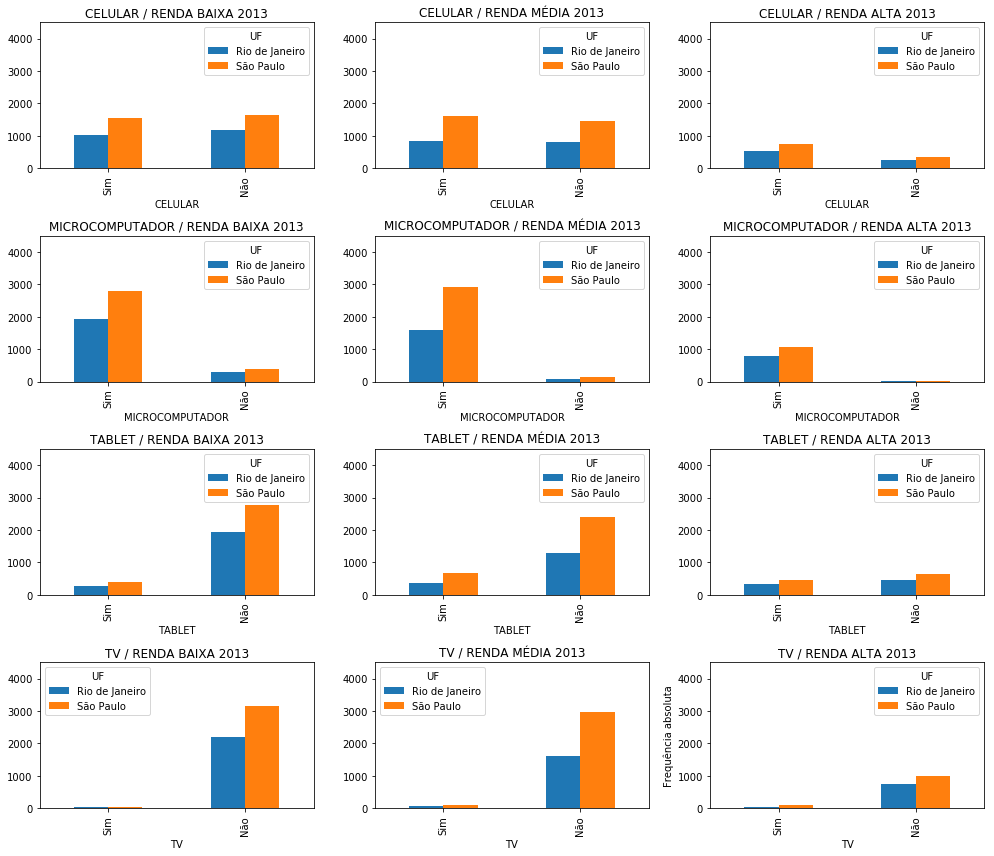

In [688]:
#e.plot(kind='bar', color=('red','blue','green','orange'), legend=True)

fig,axes = plt.subplots(nrows=4,ncols=3)

#RENDA BAIXA

CELULAR_1.plot(ylim=(0,4500),kind='bar' , ax=axes[0,0] , figsize=(10,7)); axes[0,0].set_title('CELULAR / RENDA BAIXA 2013')
MICROCOMPUTADOR_1.plot( kind='bar',ax=axes[1,0],figsize=(10,7), ylim=(0,4500)); axes[1,0].set_title('MICROCOMPUTADOR / RENDA BAIXA 2013')
TABLET_1.plot(kind='bar',ax=axes[2,0],figsize=(10,7), ylim=(0,4500)); axes[2,0].set_title('TABLET / RENDA BAIXA 2013')
TV_1.plot(ylim = (0,4500),kind='bar',ax=axes[3,0], figsize=(14,12)); axes[3,0].set_title('TV / RENDA BAIXA 2013')

#RENDA MÉDIA

CELULAR_2.plot(ylim=(0,4500),kind='bar' , ax=axes[0,1] , figsize=(10,7)); axes[0,1].set_title('CELULAR / RENDA MÉDIA 2013')
MICROCOMPUTADOR_2.plot( kind='bar',ax=axes[1,1],figsize=(10,7), ylim=(0,4500)); axes[1,1].set_title('MICROCOMPUTADOR / RENDA MÉDIA 2013')
TABLET_2.plot(kind='bar',ax=axes[2,1],figsize=(10,7), ylim=(0,4500)); axes[2,1].set_title('TABLET / RENDA MÉDIA 2013')
TV_2.plot(ylim = (0,4500),kind='bar',ax=axes[3,1], figsize=(14,12)); axes[3,1].set_title('TV / RENDA MÉDIA 2013')

#RENDA ALTA

CELULAR_3.plot(ylim=(0,4500),kind='bar' , ax=axes[0,2] , figsize=(10,7)); axes[0,2].set_title('CELULAR / RENDA ALTA 2013')
MICROCOMPUTADOR_3.plot( kind='bar',ax=axes[1,2],figsize=(10,7), ylim=(0,4500)); axes[1,2].set_title('MICROCOMPUTADOR / RENDA ALTA 2013')

plt.ylabel('Frequência absoluta')

TABLET_3.plot(kind='bar',ax=axes[2,2],figsize=(10,7), ylim=(0,4500)); axes[2,2].set_title('TABLET / RENDA ALTA 2013')
plt.ylabel('Frequência absoluta')

TV_3.plot(ylim = (0,4500),kind='bar',ax=axes[3,2], figsize=(14,12)); axes[3,2].set_title('TV / RENDA ALTA 2013')

plt.ylabel('Frequência absoluta')

plt.tight_layout()


___
## Conclusão 

Descreva aqui suas conclusões!

   A partir dos gráficos é possível identificar que tipo de dispositivo é o mais utilizado pelas diferentes faixas salariais. Em 2015, o celular foi o mais utilizado para os indivíduos que pertencem a classificação de renda baixa (um salário mínimo); já os que são da renda média, ou seja que ganham de um até três salários mínimos, estão divididos pois em São Paulo a preferencia é por celular e no Rio de Janeiro por microcomputador; e os que pertencem a renda alta ( mais que três salários mínimos), nota-se que existe a igualdade do uso dos dispositivos (celular e microcomputador), provavelmente este fenômeno acontece pelo avanço tecnológico dos celulares que cada vez mais possuem a capacidade de efetuar as mesmas atividades de um microcomputador.
Em 2014 e 2013, a situação foi um pouco diferente para outras faixas econômicas porém a mesma para a de baixa renda, sendo assim, a permanência pelo mais uso do celular. Já para as rendas media e alta, o uso de microcomputador foi mais elevado comparada as de mais categorías.